<a href="https://colab.research.google.com/github/jumbokh/ML-Class/blob/main/notebooks/PCA_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### https://towardsdatascience.com/feature-selection-techniques-for-classification-and-python-tips-for-their-application-10c0ddd7918b

In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

In [2]:
h = .01
x_min, x_max = -4,4
y_min, y_max = -1.5,1.5

In [3]:
# loading dataset
data = load_iris()
X, y = data.data, data.target

In [4]:
# selecting first 2 components of PCA
X_pca = PCA().fit_transform(X)
X_selected = X_pca[:,:2]

In [5]:
# training classifier and evaluating on the whole plane
clf = SVC(kernel='linear')
clf.fit(X_selected,y)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

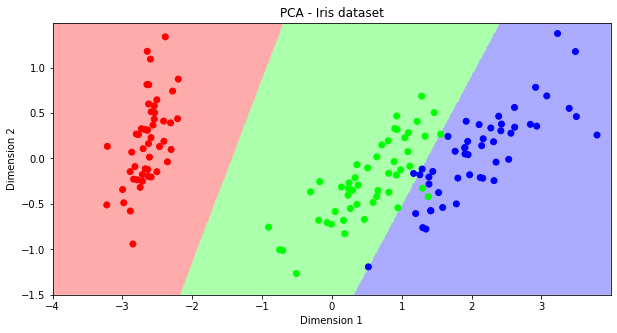

In [6]:
# Plotting
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.figure(figsize=(10,5))
plt.pcolormesh(xx, yy, Z, alpha=.6,cmap=cmap_light)
plt.title('PCA - Iris dataset')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.scatter(X_pca[:,0],X_pca[:,1],c=data.target,cmap=cmap_bold)
plt.show()

In [1]:
!pip install mlxtend==0.13.0

In [2]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_pca_correlation_graph
data = load_iris()
X, y = data.data, data.target
plt.figure(figsize=(10,5))
X_pca = PCA().fit_transform(X)
plt.title('PCA - Iris dataset')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.scatter(X_pca[:,0],X_pca[:,1],c=data.target)
_ = plot_pca_correlation_graph(X,data.feature_names)

ImportError: ignored

In [3]:
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.datasets import load_iris
data = load_iris()
X,y = data.data, data.target
chi2_score, chi_2_p_value = chi2(X,y)
f_score, f_p_value = f_classif(X,y)
mut_info_score = mutual_info_classif(X,y)
pairwise_tukeyhsd = [list(pairwise_tukeyhsd(X[:,i],y).reject) for i in range(4)]
print('chi2 score        ', chi2_score)
print('chi2 p-value      ', chi_2_p_value)
print('F - score score   ', f_score)
print('F - score p-value ', f_p_value)
print('mutual info       ', mut_info_score)
print('pairwise_tukeyhsd',pairwise_tukeyhsd)

chi2 score         [ 10.81782088   3.7107283  116.31261309  67.0483602 ]
chi2 p-value       [4.47651499e-03 1.56395980e-01 5.53397228e-26 2.75824965e-15]
F - score score    [ 119.26450218   49.16004009 1180.16118225  960.0071468 ]
F - score p-value  [1.66966919e-31 4.49201713e-17 2.85677661e-91 4.16944584e-85]
mutual info        [0.48601064 0.27749426 0.9842643  0.98303384]
pairwise_tukeyhsd [[True, True, True], [True, True, True], [True, True, True], [True, True, True]]


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### View ways to rank features

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


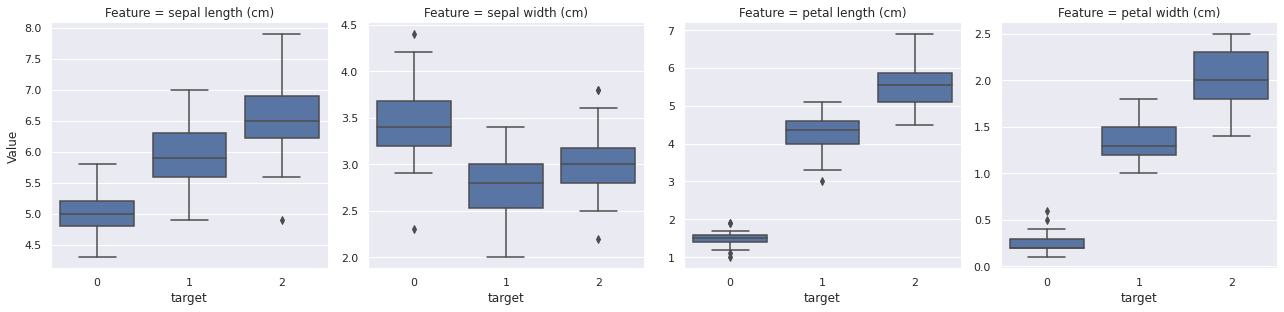

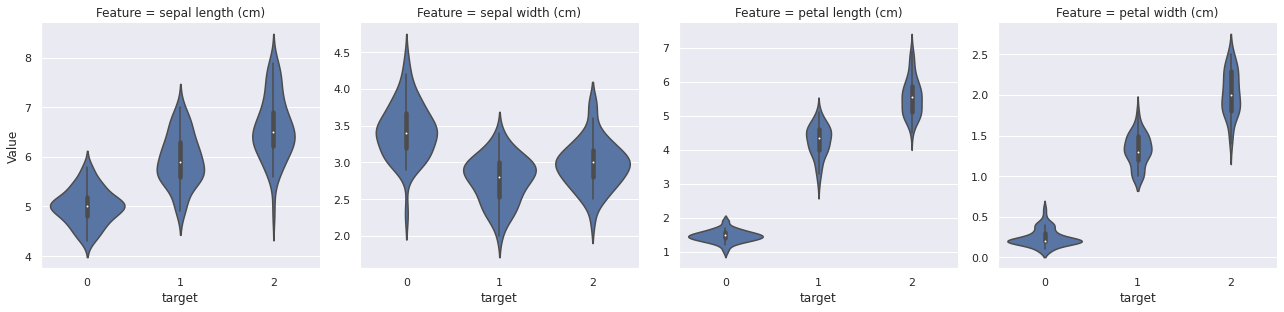

In [4]:
import pandas as pd
import seaborn as sns
sns.set()
df = pd.DataFrame(data.data,columns=data.feature_names)
df['target'] = data.target
df_temp = pd.melt(df,id_vars='target',value_vars=list(df.columns)[:-1], 
                  var_name="Feature", value_name="Value")
g = sns.FacetGrid(data = df_temp, col="Feature", col_wrap=4, size=4.5,sharey = False)
g.map(sns.boxplot,"target", "Value");
g = sns.FacetGrid(data = df_temp, col="Feature", col_wrap=4, size=4.5,sharey = False)
g.map(sns.violinplot,"target", "Value");

### Feature ranking with the ROC cure

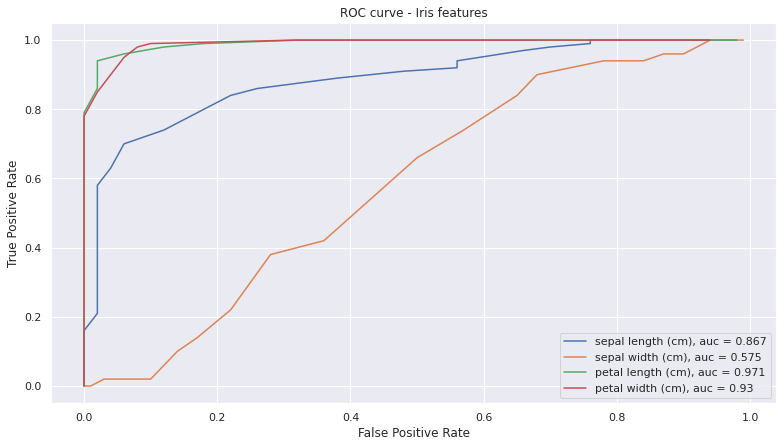

In [5]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import numpy as np
# loading dataset
data = load_iris()
X, y = data.data, data.target
y_ = y == 2
plt.figure(figsize=(13,7))
for col in range(X.shape[1]):
    tpr,fpr = [],[]
    for threshold in np.linspace(min(X[:,col]),max(X[:,col]),100):
        detP = X[:,col] < threshold
        tpr.append(sum(detP & y_)/sum(y_))# TP/P, aka recall
        fpr.append(sum(detP & (~y_))/sum((~y_)))# FP/N
        
    if auc(fpr,tpr) < .5:
        aux = tpr
        tpr = fpr
        fpr = aux
    plt.plot(fpr,tpr,label=data.feature_names[col] + ', auc = '\
                           + str(np.round(auc(fpr,tpr),decimals=3)))
plt.title('ROC curve - Iris features')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Multivariate Filter methods

In [7]:
! pip install pymrmr

     |████████████████████████████████| 71kB 3.3MB/s 
  Created wheel for pymrmr: filename=pymrmr-0.1.11-cp37-cp37m-linux_x86_64.whl size=276578 sha256=1ec40cdea5911ce0fe67a8cc84fcf1dd117dcab37739528407c36b6801cf51b2
  Stored in directory: /root/.cache/pip/wheels/9b/e2/c2/4b232fc0b8128263b518808866f5797070fe6750203ad1027a
Successfully built pymrmr


In [10]:
import pandas as pd
import pymrmr
df = pd.read_csv('features.csv')
data = df.drop('Type', axis=1)
# Pass a dataframe with a predetermined configuration. 
# Check http://home.penglab.com/proj/mRMR/ for the dataset requirements
pymrmr.mRMR(data, 'MIQ', 10)

['falcon',
 'fox',
 'tiger',
 'hen',
 'goose',
 'owl',
 'eagle',
 'wolf',
 'zebra',
 'lion']

### Feature importances from tree-based models

In [14]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
import numpy as np
boston = load_boston()
X = boston.data
Y = boston.target
feat_names = boston.feature_names 
rf = RandomForestRegressor()
rf.fit(X, Y)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), feat_names), 
             reverse=True))

Features sorted by their score:
[(0.4412, 'RM'), (0.3622, 'LSTAT'), (0.0724, 'DIS'), (0.0396, 'CRIM'), (0.0205, 'NOX'), (0.015, 'PTRATIO'), (0.0148, 'TAX'), (0.0126, 'AGE'), (0.011, 'B'), (0.0054, 'INDUS'), (0.0032, 'RAD'), (0.001, 'ZN'), (0.001, 'CHAS')]


### A Python Package for wrapper methods

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.


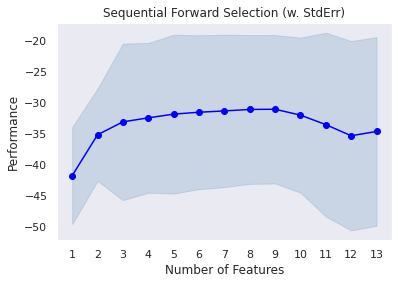

In [16]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
boston = load_boston()
X, y = boston.data, boston.target
lr = LinearRegression()
sfs = SFS(lr, 
          k_features=13, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)
sfs = sfs.fit(X, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

### Embedded methods for Linear classifiers

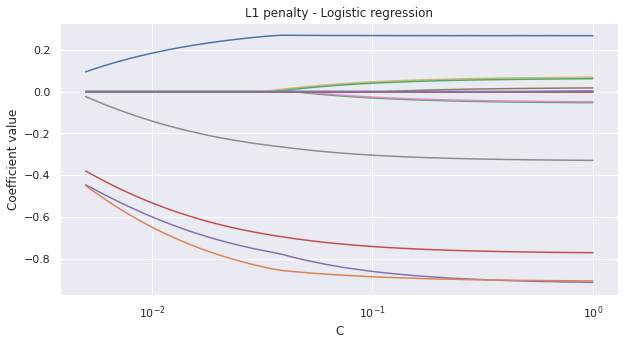

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.utils import check_random_state
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
rnd = check_random_state(1)
# set up dataset
n_samples = 3000
n_features = 15
# l1 data (only 5 informative features)
X, y = datasets.make_classification(n_samples=n_samples,
                                        n_features=n_features, n_informative=5,
                                        random_state=1)
cs = np.logspace(-2.3, 0, 50)
coefs = []
for c in cs:
    clf = LogisticRegression(solver='liblinear',C=c,penalty='l1')
    # clf = LinearSVC(C=c,penalty='l1', loss='squared_hinge', dual=False, tol=1e-3)
    
    clf.fit(X,y)
    coefs.append(list(clf.coef_[0]))
    
coefs = np.array(coefs)
plt.figure(figsize=(10,5))
for i,col in enumerate(range(n_features)):
    plt.plot(cs,coefs[:,col])
plt.xscale('log')
plt.title('L1 penalty - Logistic regression')
plt.xlabel('C')
plt.ylabel('Coefficient value')
plt.show()

### SHAP: Reliable feature importances from tree models

In [12]:
!pip install shap

     |████████████████████████████████| 358kB 7.6MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491624 sha256=49b4ad2c47ddaf0b6b82243baa899b10f1d8310fee75d5fa36ba873a78852aa5
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


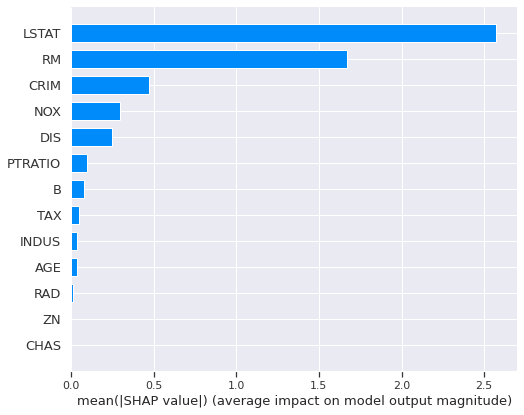

In [13]:
import xgboost
import shap
# load JS visualization code to notebook
shap.initjs()
# train XGBoost model
X,y = shap.datasets.boston()
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")